In [1]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
sounding = open ("KBIS_121222_1200.txt","r").readlines()

In [31]:
data = pd.read_csv("KBIS_121222_1200.txt", delimiter = ",")
print(data)

    station             validUTC  levelcode  pressure_mb  height_m   tmpc  \
0      KBIS  2022-12-12 12:00:00          9        951.0     503.0   -3.7   
1      KBIS  2022-12-12 12:00:00          4       1000.0     104.0      M   
2      KBIS  2022-12-12 12:00:00          5        946.0     545.0   -3.3   
3      KBIS  2022-12-12 12:00:00          6        938.3     609.0      M   
4      KBIS  2022-12-12 12:00:00          5        937.0     620.0   -3.7   
..      ...                  ...        ...          ...       ...    ...   
99     KBIS  2022-12-12 12:00:00          4         10.0   30080.0  -70.9   
100    KBIS  2022-12-12 12:00:00          6          9.3   30486.0      M   
101    KBIS  2022-12-12 12:00:00          5          9.1   30636.0  -71.7   
102    KBIS  2022-12-12 12:00:00          5          8.9   30767.0  -71.5   
103    KBIS  2022-12-12 12:00:00          6          8.8   30790.0      M   

     dwpc   drct speed_kts bearing range_sm  
0    -5.4  150.0         5   

In [81]:
pressure = np.array(data["pressure_mb"].values)
pressure = pressure * units("millibar")
#print(pressure)

height = np.array(data["height_m"].values)
height = height * units("meters")
#print(height)

temp = np.array(data["tmpc"].values)
temp2= []
for i in range(len(temp)):
    if temp[i] !="M":
        temp2.append(temp[i])

#temp2 = temp2 * units("degC")
print(temp2)



    



dew = np.array(data["dwpc"].values)
dew = dew * units("degC")
#print(dew)

#uWind = np.array(data["u-wind[m/s]"].values)
#uWind = uWind * units("m/s")
#uWind = uWind.to("knots")
#print(uWind)

#vWind = np.array(data["v-wind[m/s]"].values)
#vWind = vWind * units("m/s")
#vWind = vWind.to("knots")
#print(vWind)'''


['-3.7', '-3.3', '-3.7', '-4.3', '8.2', '8.4', '8.0', '-0.3', '-1.3', '-3.5', '-11.3', '-14.7', '-21.9', '-27.7', '-30.3', '-34.1', '-42.5', '-46.5', '-50.7', '-51.5', '-60.7', '-60.9', '-61.5', '-58.3', '-58.5', '-59.1', '-57.5', '-60.9', '-57.9', '-52.7', '-57.9', '-57.9', '-60.5', '-60.7', '-58.9', '-60.3', '-59.3', '-58.5', '-57.1', '-59.3', '-64.5', '-63.1', '-63.5', '-70.7', '-71.5', '-70.1', '-70.9', '-71.7', '-71.5']


ValueError: could not convert string to float: 'M'

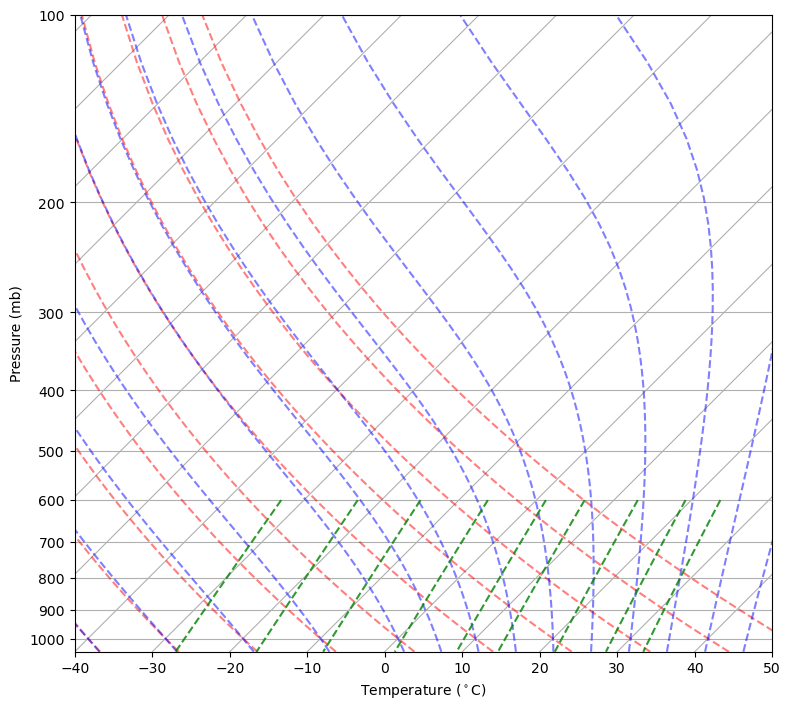

In [43]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = (9,9),dpi=100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel("Temperature ($^\circ$C)")
#add a y label with units 
plt.ylabel("Pressure (mb)")

#add temperature in red

plt.plot(temp,pressure, color = "red")
#add dewpoint in blue
plt.plot(dew,pressure, color = "blue")

#plot wind barbs
skew.plot_barbs(pressure, uWind, vWind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-35,30)

#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(975,200)

#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig("KBIS_12_12_22_skewT.png")